# Percentile Method and Winsorization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('weight-height.csv')

In [3]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
df.shape

(10000, 3)

## Describe Height 

In [5]:
df['Height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

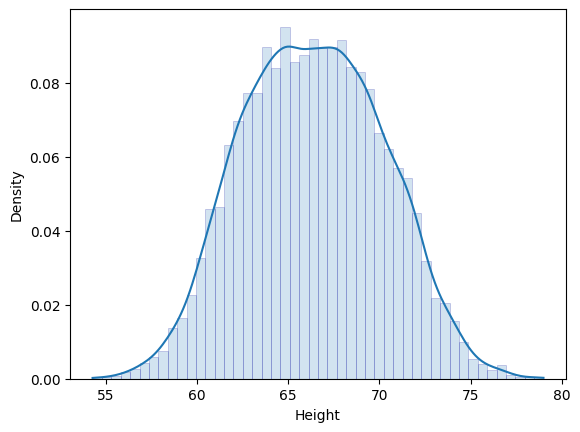

In [17]:
sns.histplot(df['Height'], kde = True, stat = 'density', alpha = 0.2, edgecolor = (0,0,0.6, 0.2))
plt.show()

<Axes: ylabel='Height'>

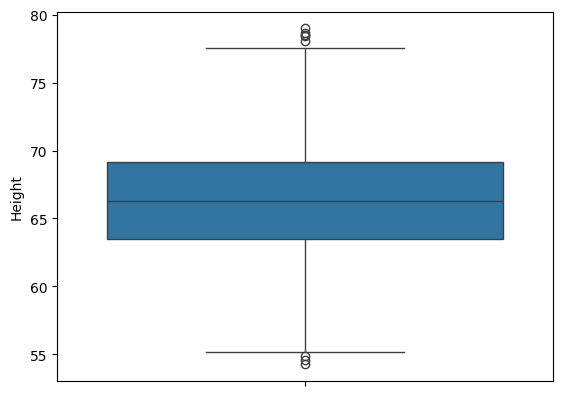

In [18]:
sns.boxplot(df['Height'])

## Define Upper Limit

In [21]:
Uplmt = df['Height'].quantile(0.99)
Lolmt = df['Height'].quantile(0.01)

In [22]:
Uplmt, Lolmt

(74.7857900583366, 58.13441158671655)

## Set Range: If criteria is not fullfilled

In [27]:
df[(df['Height'] >= Uplmt) | (df['Height'] <= Lolmt)]

,Gender,Height,Weight
23,Male,75.205974,228.761781
190,Male,76.709835,235.035419
197,Male,75.944460,231.924749
202,Male,75.140821,224.124271
215,Male,74.795375,232.635403
...,...,...,...
9761,Female,56.975279,90.341784
9825,Female,55.979198,85.417534
9895,Female,57.740192,93.652957
9904,Female,57.028857,101.202551


## Define New DF with limit  (Trimming through Percentile)

In [35]:
new_df = df[(df['Height'] <= Uplmt) & (df['Height'] >= Lolmt)]
new_df['Height'].describe(), df['Height'].describe()

(count    9800.000000
 mean       66.364366
 std         3.645075
 min        58.134496
 25%        63.577162
 50%        66.318070
 75%        69.119896
 max        74.785714
 Name: Height, dtype: float64,
 count    10000.000000
 mean        66.367560
 std          3.847528
 min         54.263133
 25%         63.505620
 50%         66.318070
 75%         69.174262
 max         78.998742
 Name: Height, dtype: float64)

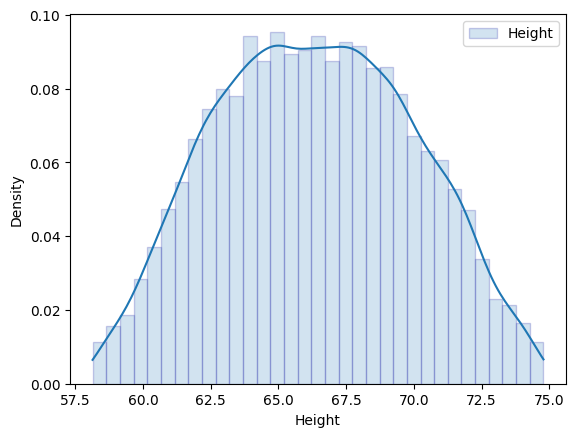

In [41]:
sns.histplot(new_df['Height'], kde= True, stat='density', alpha = 0.2, edgecolor = (0,0,0.6, 0.2), label = 'Height')
plt.legend()
plt.show()

<Axes: ylabel='Height'>

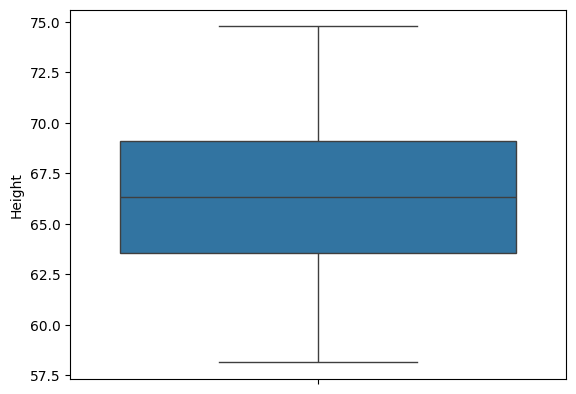

In [42]:
sns.boxplot(new_df['Height'])

## Capping with Winsorization

In [45]:
df['Height'] = np.where(df['Height'] >= Uplmt, Uplmt, np.where(df['Height'] < Lolmt, Lolmt, df['Height']))
df['Height']

0       73.847017
1       68.781904
2       74.110105
3       71.730978
4       69.881796
          ...    
9995    66.172652
9996    67.067155
9997    63.867992
9998    69.034243
9999    61.944246
Name: Height, Length: 10000, dtype: float64

In [46]:
df.shape

(10000, 3)

In [47]:
df.head(3)

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856


In [49]:
df['Height'].describe()

count    10000.000000
mean        66.366281
std          3.795717
min         58.134412
25%         63.505620
50%         66.318070
75%         69.174262
max         74.785790
Name: Height, dtype: float64

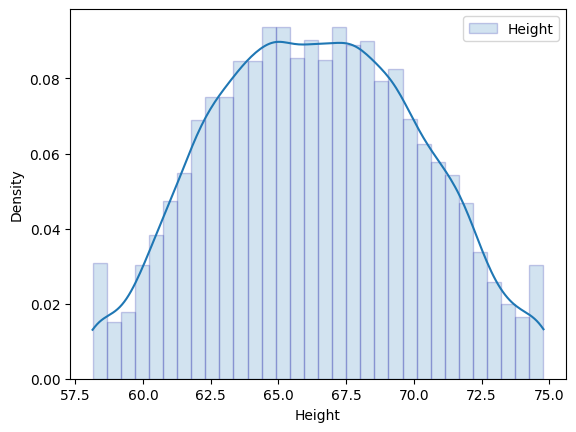

In [50]:
sns.histplot(df['Height'], kde= True, stat='density', alpha = 0.2, edgecolor = (0,0,0.6, 0.2), label = 'Height')
plt.legend()
plt.show()

<Axes: ylabel='Height'>

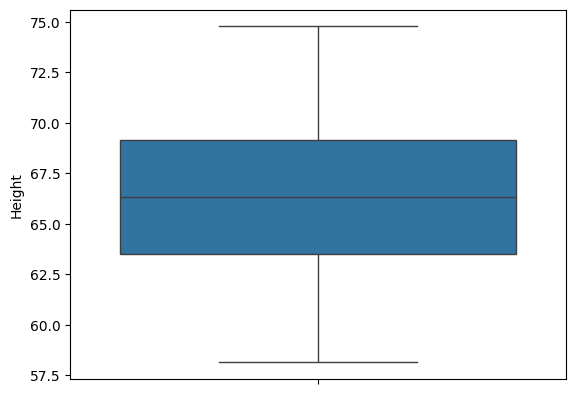

In [52]:
sns.boxplot(df['Height'])